In [1]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score
from pdpbox.pdp import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact,pdp_interact_plot
import eli5
from eli5.sklearn import PermutationImportance
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
from joblib import dump
from joblib import load
%config IPCompleter.greedy=True

In [2]:
# size for web display later
plt.rcParams['figure.dpi'] = 72

In [3]:
# df = pd.read_csv('vehicles.csv')
# df.head()

In [4]:
# df1 = df.drop(columns = ['description', 'url', 'region_url'] )

In [5]:
# df1.shape

In [6]:
# df1.isnull().sum()

In [7]:
# df1.to_csv('vehicles_trimmed.csv')

In [8]:
# ONLINE DOWNLOAD
# !wget https://drive.google.com/uc?id=1G4cm0Y7HyF8p6Kkg2u1Ze15VlcsUqPf6&export=download


In [3]:
df1 = pd.read_csv('vehicles_trimmed1.csv')
df1

,Unnamed: 0,id,region,price,year,manufacturer,model,condition,cylinders,fuel,...,transmission,drive,size,type,paint_color,image_url,county,state,lat,long
0,0,7034441763,salt lake city,17899.0,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,...,manual,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,NaN,ut,40.7372,-111.858
1,1,7034440610,salt lake city,NaN,2016.0,ford,f-150,excellent,NaN,gas,...,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,NaN,ut,40.5881,-111.884
2,2,7034440588,salt lake city,46463.0,2015.0,gmc,sierra 1500,excellent,NaN,gas,...,automatic,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,NaN,ut,40.5881,-111.884
3,3,7034440546,salt lake city,NaN,2016.0,ford,f-150,excellent,NaN,gas,...,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,NaN,ut,40.5881,-111.884
4,4,7034406932,salt lake city,49999.0,2018.0,ford,f-450,NaN,NaN,diesel,...,automatic,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,NaN,ut,40.3744,-104.694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509572,509572,7034554007,salt lake city,15476.0,2012.0,nissan,xterra,NaN,6 cylinders,gas,...,automatic,4wd,NaN,SUV,NaN,https://images.craigslist.org/00z0z_3ERBmVoD5s...,NaN,ut,39.6405,-104.961
509573,509573,7034538385,salt lake city,9881.0,2008.0,bmw,3 series 328i,NaN,6 cylinders,gas,...,automatic,rwd,NaN,convertible,NaN,https://images.craigslist.org/01313_38rMiNAW18...,NaN,ut,39.6405,-104.961
509574,509574,7034523643,salt lake city,24895.0,2019.0,jeep,cherokee,NaN,4 cylinders,gas,...,automatic,4wd,NaN,SUV,white,https://images.craigslist.org/00606_dOtGS5RmTi...,NaN,ut,45.1637,-113.894
509575,509575,7034458858,salt lake city,32500.0,2017.0,NaN,Porsche Macan GTS,excellent,6 cylinders,gas,...,automatic,NaN,NaN,NaN,red,https://images.craigslist.org/00s0s_32yAwr0KMt...,NaN,ut,41.3112,-111.969


Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?
- [x] Is your problem regression or classification?
- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [10]:
df1.columns

Index(['Unnamed: 0', 'id', 'region', 'price', 'year', 'manufacturer', 'model',
       'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'image_url',
       'county', 'state', 'lat', 'long'],
      dtype='object')

In [11]:
# Choose target
target = 'price'

In [12]:
# Is your problem regression or classification?
# Regression, predicting a continuous variable with many levels

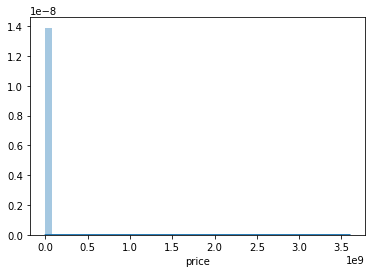

In [13]:
# Target distribution

sns.distplot(df1['price'])

In [14]:
pd.options.display.float_format = '{:.1f}'.format

In [15]:
print(np.median(df1['price']))
y = df1['price']
y.describe()
# Very right skewed but the 0s are holding it back even more. 
# Let's look at logs

nan


count       465998.0
mean         59921.3
std       10012722.5
min              1.0
25%           5000.0
50%          10500.0
75%          18950.0
max     3600028900.0
Name: price, dtype: float64

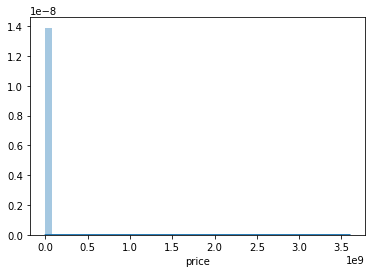

In [16]:
y = y.replace(0, np.NaN)
sns.distplot(y)

In [17]:
# It was deemed not worth log transforming, I did some modeling below and R^2 was worse
# y_log = np.log1p(y)
# sns.distplot(y_log)

In [4]:
# Chop out some outliers

# Also consider doing the test val train split before this and writing a function for it all
df2 = df1
df2['price'] = df2['price'].replace(0,np.NaN)
df2 = df2.dropna(subset=['price'])
df2 = df2[(df2['price'] >= np.percentile(df2['price'], 0.05)) &
          (df2['price'] <= np.percentile(df2['price'], 99.95))]
df2['price'].describe()

count    465765.000000
mean      13606.176892
std       11430.780580
min           1.000000
25%        5000.000000
50%       10500.000000
75%       18949.000000
max      149000.000000
Name: price, dtype: float64

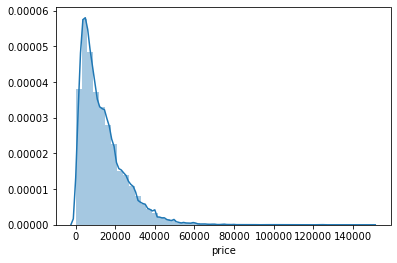

In [19]:
sns.distplot(df2['price'])

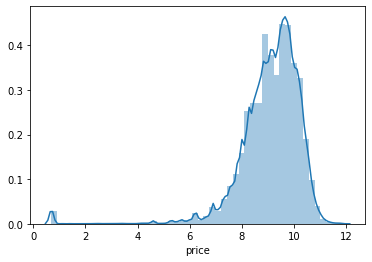

In [20]:
y = np.log1p(df2['price'])
sns.distplot(y)
# Now it's left skewed

In [21]:
y.describe()

count   465765.0
mean         9.1
std          1.2
min          0.7
25%          8.5
50%          9.3
75%          9.8
max         11.9
Name: price, dtype: float64

In [22]:
# Dollar amount of the average
np.e**9.1

8955.292703482504

In [23]:
# Choose your evaluation metric(s).

# R^2, MAE isn't as good with the log transformation

In [5]:
#Choose which observations you will use to train, validate, and test your model.
train_orig, test = train_test_split(df2.drop(columns=['county','Unnamed: 0']) , test_size = 0.1, train_size = 0.9)
test

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
232278,7046836500,des moines,4750.0,2008.0,nissan,altima,NaN,4 cylinders,gas,137164.0,clean,automatic,fwd,NaN,sedan,brown,https://images.craigslist.org/00p0p_gwhKkt5SXU...,ia,42.7407,-93.2025
267693,7048906610,boston,13700.0,2011.0,audi,s5,NaN,NaN,gas,118365.0,clean,automatic,NaN,NaN,coupe,silver,https://images.craigslist.org/00909_eiCXlDFU1w...,ma,42.4480,-70.9651
81020,7049756366,chico,11995.0,2009.0,buick,enclave cxl,NaN,NaN,gas,84648.0,clean,automatic,fwd,NaN,SUV,white,https://images.craigslist.org/00a0a_59jYk1Bgp6...,ca,39.7433,-121.8860
196355,7045215089,savannah / hinesville,6000.0,2008.0,acura,tl,excellent,6 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00i0i_kGdhkYPZHG...,ga,32.1082,-81.1746
242218,7048583713,"kansas city, MO",2550.0,2003.0,honda,accord lx,good,6 cylinders,gas,221000.0,clean,automatic,fwd,mid-size,sedan,blue,https://images.craigslist.org/00C0C_auECdrtRKI...,ks,38.9528,-94.4705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419661,7044690143,corvallis/albany,18995.0,2015.0,subaru,outback,excellent,NaN,gas,73537.0,clean,automatic,4wd,NaN,NaN,NaN,https://images.craigslist.org/00D0D_3p8tqUHf8v...,or,44.5664,-123.2590
172893,7046522446,orlando,999.0,2000.0,honda,civic lx,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00N0N_1R0XxKdoxJ...,fl,28.7809,-81.2915
29651,7037693171,wenatchee,47995.0,2018.0,ford,expedition max,NaN,6 cylinders,gas,37606.0,clean,automatic,4wd,NaN,SUV,grey,https://images.craigslist.org/00H0H_5SrzQxQ6p2...,wa,48.3988,-119.5410
338257,7048312712,raleigh / durham / CH,6950.0,2006.0,bmw,x3,good,6 cylinders,gas,100.0,clean,automatic,4wd,NaN,SUV,black,https://images.craigslist.org/00w0w_9I7a2MLjth...,nc,35.8812,-78.5729


In [6]:
train, val = train_test_split(train_orig, train_size = 0.9, test_size = 0.1)
train

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
12718,7045074162,richmond,1800.0,1999.0,bmw,528i,good,6 cylinders,gas,NaN,clean,manual,rwd,mid-size,sedan,blue,https://images.craigslist.org/00p0p_ghynFumI1d...,va,37.4638,-77.3980
8269,7037331370,new river valley,22900.0,2008.0,ford,f-350,NaN,NaN,diesel,156079.0,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/01616_imh6i4Sr8Z...,va,38.3295,-77.7327
325578,7040078979,asheville,1000.0,2013.0,bmw,750li,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/01111_1IQyG3RGWr...,nc,33.9845,-84.1529
72887,7038876171,fayetteville,18815.0,2012.0,chevrolet,silverado 1500,NaN,8 cylinders,NaN,85463.0,clean,automatic,4wd,NaN,pickup,red,https://images.craigslist.org/00Z0Z_6erWLzRq6L...,ar,36.1094,-94.1770
190489,7034779837,athens,9000.0,1982.0,chevrolet,corvette,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00808_g6ExHCnAyO...,ga,34.1082,-82.8448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113059,7049964266,san diego,800.0,1988.0,ram,50,NaN,NaN,gas,NaN,clean,manual,NaN,NaN,NaN,NaN,https://images.craigslist.org/00505_k1gSSX7mcm...,ca,32.6242,-116.9790
24040,7049198612,olympic peninsula,10995.0,2008.0,jeep,commander limited,excellent,8 cylinders,gas,129000.0,clean,automatic,4wd,NaN,SUV,white,https://images.craigslist.org/00I0I_7U1kouU32j...,wa,48.0877,-123.2180
53900,7048241944,montgomery,1000.0,2015.0,toyota,camry,new,4 cylinders,gas,108000.0,clean,automatic,fwd,full-size,sedan,red,https://images.craigslist.org/00a0a_1dVTWmohv9...,al,33.4062,-86.9599
213606,7048546303,chicago,20990.0,2012.0,chevrolet,silverado 2500hd,good,8 cylinders,gas,29116.0,clean,automatic,4wd,full-size,truck,yellow,https://images.craigslist.org/00X0X_3OxjDZqBVB...,il,40.4688,-74.2817


In [26]:
#  Begin to clean and explore your data.
# - [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
# Question about what to do with price distribution: should I keep closing in the quartiles until the lower hump is left out?
# NaNs? Get rid of them?

In [27]:
# Wrangle ML datasets¶
# x Continue to clean and explore your data.
#  For the evaluation metric you chose, what score would you get just by guessing?
#  Can you make a fast, first model that beats guessing?

In [28]:
len(train['price'])

377269

In [29]:
# MEAN BASELINE
#  For the evaluation metric you chose, what score would you get just by guessing?
# R^2 for a flat line of the mean would be 0. Let's look at the MAE
list_of_mean = [train['price'].mean()] * len(val['price'])
mean_absolute_error(val['price'], list_of_mean)

8614.147705765286

In [30]:
# LINEAR REGRESSION (to beat) BASELINE
# Let's do a univariate linear regression as a baseline as well
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(train[['year']])
lr = LinearRegression()
model = lr.fit(imp_mean.transform(train[['year']]),train['price'])

print('MAE:', mean_absolute_error(val['price'], model.predict(imp_mean.transform(val[['year']]))))
print('R^2:', r2_score(val['price'], model.predict(imp_mean.transform(val[['year']]))))
# Alrighty then. Got some baselines!

MAE: 7820.835422373069
R^2: 0.10786970316982225


In [31]:
target = 'price'
features = ['region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'lat',
       'long']
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [32]:
# Heck let's do a decision tree as a baseline too
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    DecisionTreeRegressor(max_depth=10)
)
pipeline.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['region', 'manufacturer', 'model',
                                      'condition', 'cylinders', 'fuel',
                                      'title_status', 'transmission', 'drive',
                                      'size', 'type', 'paint_color', 'state'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'region',
                                          'data_type': dtype('O'),
                                          'mapping': las vegas                 1
milwaukee                 2
g...
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       

In [33]:
y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# Pretty dope tree

MAE: 4011.504400330999
R^2: 0.6602525532696953


In [34]:
# Permutation & Boosting¶
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x If you haven't completed assignment #1, please do so first.
# x Continue to clean and explore your data. Make exploratory visualizations.
# x Fit a model. Does it beat your baseline?
# x Try xgboost.
# x Get your model's permutation importances.

In [35]:
train.dtypes

id                int64
region           object
price           float64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
size             object
type             object
paint_color      object
image_url        object
state            object
lat             float64
long            float64
dtype: object

Text(0.5, 1.0, 'price by year')

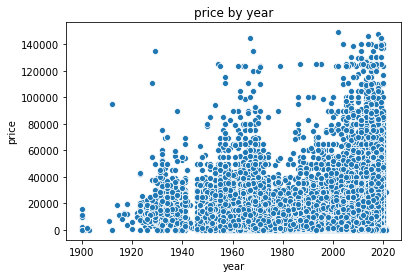

In [36]:
sns.scatterplot(train['year'], train['price'])
plt.title('price by year')

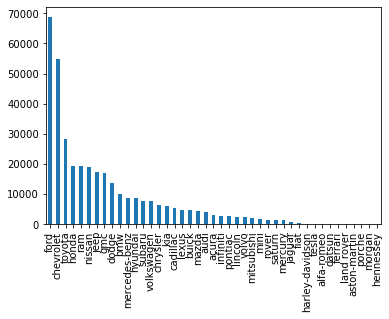

In [37]:
train['manufacturer'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'price by color')

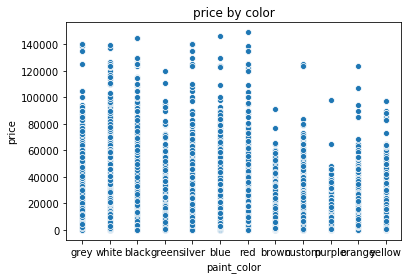

In [38]:
sns.scatterplot(train['paint_color'], train['price'])
plt.title('price by color')

In [40]:
# BEAT BASELINE WITH TREES
%time
# Random Forest model

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(n_estimators=50)
)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_val)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))

# lit, already happy about that

Wall time: 0 ns
MAE: 2228.474148699921
R^2: 0.8407542023714855


In [76]:
# XGBoost

# pipeline = make_pipeline(
#     ce.OrdinalEncoder(), 
#     # SimpleImputer(strategy='median'),  missing values accepted in this
#     XGBRegressor(n_estimators=70, random_state=42, n_jobs=-1)
# )
# pipeline.fit(X_train, y_train)

# y_pred = pipeline.predict(X_val)
# print('MAE:', mean_absolute_error(y_val, y_pred))
# print('R^2:', r2_score(y_val, y_pred))

# Much to tune indeed

[16:34:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 4085.5742847223587
R^2: 0.6513931236503634


In [80]:
# Early stopping, 
# encoder = ce.OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train)
# X_val_encoded = encoder.transform(X_val)
# model = XGBRegressor(
#     n_estimators= 500, # up to 1000, depends on early stop
#     max_depth = 7,
#     learning_rate= 0.5, # try higher learning rate
# )

# eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

# model.fit(X_train_encoded,y_train,
#           eval_set = eval_set,
#           eval_metric = 'mae',
#           early_stopping_rounds = 50)
# Random forest still better, will have to play with it

[16:53:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:7381.13	validation_1-mae:7319.4
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 50 rounds.
[1]	validation_0-mae:4988.48	validation_1-mae:4971.03
[2]	validation_0-mae:4195.16	validation_1-mae:4197.81
[3]	validation_0-mae:3923.63	validation_1-mae:3937.89
[4]	validation_0-mae:3811.74	validation_1-mae:3832.81
[5]	validation_0-mae:3730.88	validation_1-mae:3749.57
[6]	validation_0-mae:3683.74	validation_1-mae:3707.76
[7]	validation_0-mae:3625.57	validation_1-mae:3656.22
[8]	validation_0-mae:3567.49	validation_1-mae:3601.87
[9]	validation_0-mae:3530.55	validation_1-mae:3566.74
[10]	validation_0-mae:3464.69	validation_1-mae:3525.22
[11]	validation_0-mae:3442.18	validation_1-mae:3508.15
[12]	validation_0-mae:3416.68	validation_1-mae:3490.54
[13]	validation_0-mae:3

[144]	validation_0-mae:2432.46	validation_1-mae:2803.13
[145]	validation_0-mae:2427.67	validation_1-mae:2799.83
[146]	validation_0-mae:2425.76	validation_1-mae:2798.94
[147]	validation_0-mae:2424.25	validation_1-mae:2798.54
[148]	validation_0-mae:2421.37	validation_1-mae:2796.74
[149]	validation_0-mae:2420.47	validation_1-mae:2796.15
[150]	validation_0-mae:2417.03	validation_1-mae:2793.99
[151]	validation_0-mae:2415.83	validation_1-mae:2794.21
[152]	validation_0-mae:2412.13	validation_1-mae:2789.86
[153]	validation_0-mae:2407.75	validation_1-mae:2787.93
[154]	validation_0-mae:2402.06	validation_1-mae:2784.47
[155]	validation_0-mae:2399.73	validation_1-mae:2783.99
[156]	validation_0-mae:2397.33	validation_1-mae:2782.76
[157]	validation_0-mae:2394.92	validation_1-mae:2781.96
[158]	validation_0-mae:2394.13	validation_1-mae:2782.02
[159]	validation_0-mae:2390.67	validation_1-mae:2779.64
[160]	validation_0-mae:2388.25	validation_1-mae:2779.04
[161]	validation_0-mae:2385.32	validation_1-mae:

[291]	validation_0-mae:2092.08	validation_1-mae:2655
[292]	validation_0-mae:2090.34	validation_1-mae:2654.05
[293]	validation_0-mae:2086.97	validation_1-mae:2651.14
[294]	validation_0-mae:2086.1	validation_1-mae:2651.16
[295]	validation_0-mae:2085.4	validation_1-mae:2651.09
[296]	validation_0-mae:2083.53	validation_1-mae:2651
[297]	validation_0-mae:2082.74	validation_1-mae:2650.94
[298]	validation_0-mae:2080.52	validation_1-mae:2649.9
[299]	validation_0-mae:2078.92	validation_1-mae:2648.76
[300]	validation_0-mae:2076.27	validation_1-mae:2647.4
[301]	validation_0-mae:2074.2	validation_1-mae:2646.36
[302]	validation_0-mae:2072.63	validation_1-mae:2645.69
[303]	validation_0-mae:2071.39	validation_1-mae:2644.74
[304]	validation_0-mae:2069.6	validation_1-mae:2643.67
[305]	validation_0-mae:2068.66	validation_1-mae:2644.06
[306]	validation_0-mae:2067.43	validation_1-mae:2644.17
[307]	validation_0-mae:2063.38	validation_1-mae:2641.1
[308]	validation_0-mae:2060.92	validation_1-mae:2639.13
[309]

[438]	validation_0-mae:1848.94	validation_1-mae:2545.78
[439]	validation_0-mae:1847.81	validation_1-mae:2546.35
[440]	validation_0-mae:1846.45	validation_1-mae:2545.52
[441]	validation_0-mae:1845.5	validation_1-mae:2544.85
[442]	validation_0-mae:1845.09	validation_1-mae:2544.5
[443]	validation_0-mae:1843.82	validation_1-mae:2543.91
[444]	validation_0-mae:1842.41	validation_1-mae:2543.28
[445]	validation_0-mae:1841.53	validation_1-mae:2542.95
[446]	validation_0-mae:1840.28	validation_1-mae:2542.73
[447]	validation_0-mae:1839.24	validation_1-mae:2541.98
[448]	validation_0-mae:1837.83	validation_1-mae:2541.8
[449]	validation_0-mae:1835.98	validation_1-mae:2540.62
[450]	validation_0-mae:1835.39	validation_1-mae:2540.66
[451]	validation_0-mae:1833.26	validation_1-mae:2539.68
[452]	validation_0-mae:1832.18	validation_1-mae:2539.08
[453]	validation_0-mae:1830.54	validation_1-mae:2538.83
[454]	validation_0-mae:1829.63	validation_1-mae:2538.38
[455]	validation_0-mae:1828.72	validation_1-mae:253

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.5, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [52]:
# Early stopping, TUNED
%time
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
model = XGBRegressor(
    n_estimators= 350, # up to 300, depends on early stop
    max_depth = 35,
    learning_rate= 0.10, # Lower rate helps with overfitting.
    n_jobs=-3
)

eval_set = [(X_train_encoded, y_train), (X_val_encoded, y_val)]

model.fit(X_train_encoded,y_train,
          eval_set = eval_set, # This is what is being scored (why we have two col)
          eval_metric = 'mae',
          early_stopping_rounds = 2) #stop if score not improved in n rounds
    

Wall time: 0 ns
[21:48:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:12291.4	validation_1-mae:12407.6
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 2 rounds.
[1]	validation_0-mae:11114.9	validation_1-mae:11266
[2]	validation_0-mae:10055.9	validation_1-mae:10243.3
[3]	validation_0-mae:9101.46	validation_1-mae:9330.82
[4]	validation_0-mae:8241.88	validation_1-mae:8516.42
[5]	validation_0-mae:7465.79	validation_1-mae:7790.15
[6]	validation_0-mae:6765.66	validation_1-mae:7140.83
[7]	validation_0-mae:6134.09	validation_1-mae:6560.6
[8]	validation_0-mae:5564.53	validation_1-mae:6048.83
[9]	validation_0-mae:5050.42	validation_1-mae:5589.32
[10]	validation_0-mae:4586.16	validation_1-mae:5184.69
[11]	validation_0-mae:4166.84	validation_1-mae:4825.5
[12]	validation_0-mae:3788.34	validation_1-mae:4509.8
[13]	validat

[144]	validation_0-mae:21.4109	validation_1-mae:2034.21
[145]	validation_0-mae:21.3822	validation_1-mae:2034.21
[146]	validation_0-mae:21.359	validation_1-mae:2034.2
[147]	validation_0-mae:21.3387	validation_1-mae:2034.19
[148]	validation_0-mae:21.3195	validation_1-mae:2034.19
[149]	validation_0-mae:21.2998	validation_1-mae:2034.19
[150]	validation_0-mae:21.2808	validation_1-mae:2034.18
[151]	validation_0-mae:21.2623	validation_1-mae:2034.18
[152]	validation_0-mae:21.2416	validation_1-mae:2034.17
[153]	validation_0-mae:21.2233	validation_1-mae:2034.17
[154]	validation_0-mae:21.2063	validation_1-mae:2034.16
[155]	validation_0-mae:21.1889	validation_1-mae:2034.16
[156]	validation_0-mae:21.1738	validation_1-mae:2034.16
[157]	validation_0-mae:21.1573	validation_1-mae:2034.15
[158]	validation_0-mae:21.1417	validation_1-mae:2034.15
[159]	validation_0-mae:21.1263	validation_1-mae:2034.14
[160]	validation_0-mae:21.1121	validation_1-mae:2034.14
[161]	validation_0-mae:21.0994	validation_1-mae:20

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Text(0.5, 1.0, 'XGBoost MAE by Round')

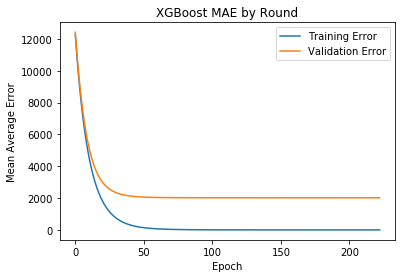

In [66]:
# Let's plot XGBoost's journey

results = model.evals_result_
training_err = results['validation_0']['mae']
validation_err = results['validation_1']['mae']
epoch = list(range(0,len(training_err)))

plt.plot(epoch,training_err, label = 'Training Error')
plt.plot(epoch,validation_err, label = 'Validation Error')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean Average Error')
plt.title('XGBoost MAE by Round')

In [47]:
# Can we just take the output model and use that??
%time
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
model.fit(X_train_encoded, y_train)

Wall time: 0 ns
[09:28:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=35, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=-3, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [44]:
# XGBoost R^2
y_pred = model.predict(X_val_encoded)
print('R^2:', r2_score(y_val, y_pred))

# BEAT BASELINE, slightly better than RF R^2= 0.8407

R^2: 0.8427885081293791


In [48]:
# Clean up for permutation importances/ pdp

imputer = SimpleImputer(strategy='median')
X_val_imputed = imputer.fit_transform(X_val_encoded)
# df_val_imputed = pd.DataFrame(data= val_imputed, columns=val.columns)
# X_val_imputed = df_val_imputed[features]


xgb = model.fit(X_val_imputed, y_val)

[10:29:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [93]:
# Permutation importances
permuter = PermutationImportance(
    model,
    scoring= 'r2',
    n_iter = 5,
    random_state=42

)

permuter.fit(X_val_imputed, y_val)

PermutationImportance(cv='prefit',
                      estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             importance_type='gain',
                                             learning_rate=0.1,
                                             max_delta_step=0, max_depth=35,
                                             min_child_weight=1, missing=None,
                                             n_estimators=350, n_jobs=-3,
                                             nthread=None,
                                             objective='reg:linear',
                                             random_state=0, reg_alpha=0,
                                             reg_lambda=1, scale_pos_weight=1,
                                     

In [50]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

# Here I can consider cutting down columns, would it make a better app?\
# predictively I'm ok, not phenomenal, so should I prioritize ^

year           0.7
odometer       0.4
fuel           0.3
cylinders      0.2
manufacturer   0.2
drive          0.1
model          0.1
long           0.1
lat            0.1
type           0.1
region         0.0
condition      0.0
state          0.0
paint_color    0.0
size           0.0
transmission   0.0
title_status   0.0
dtype: float64

In [51]:
eli5.show_weights(
    permuter,
    top=11, # number of features to show, no limit
    feature_names= feature_names, # must be a list
)

Weight,Feature
0.7467 ± 0.0103,year
0.4128 ± 0.0028,odometer
0.2533 ± 0.0115,fuel
0.1828 ± 0.0024,cylinders
0.1812 ± 0.0086,manufacturer
0.1348 ± 0.0012,drive
0.0849 ± 0.0066,model
0.0731 ± 0.0030,long
0.0701 ± 0.0031,lat
0.0589 ± 0.0021,type


In [ ]:
# Model Interpretation
# You will use your portfolio project dataset for all assignments this sprint.

# Assignment
# Complete these tasks for your project, and document your work.

# x Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
# x Make at least 1 partial dependence plot to explain your model.
# x Make at least 1 Shapley force plot to explain an individual prediction.
# x Share at least 1 visualization (of any type) on Slack!
# Stretch Goals
# Partial Dependence Plots
#  Make multiple PDPs with 1 feature in isolation.
# x Make multiple PDPs with 2 features in interaction.
#  Use Plotly to make a 3D PDP.

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2a68d2324c8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2a6a0229c48>})

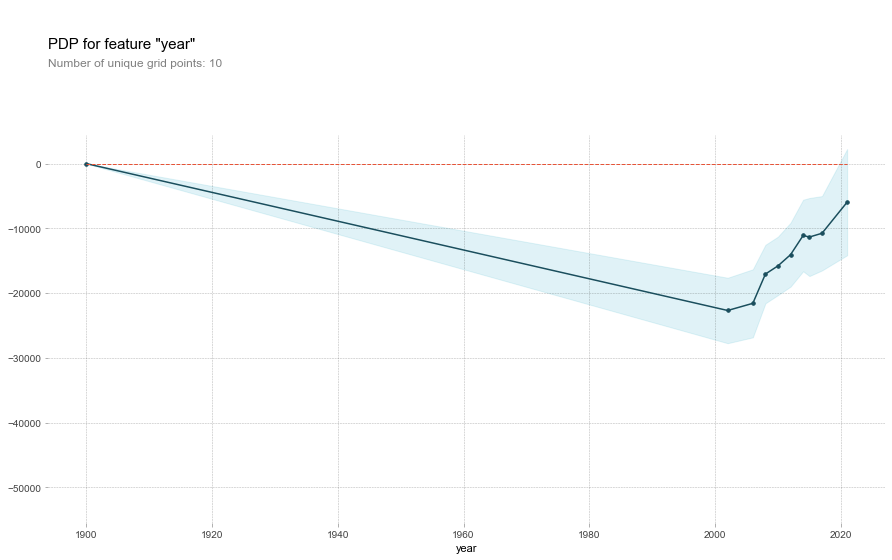

In [106]:
# x Make at least 1 partial dependence plot to explain your model.

val_imp_df = pd.DataFrame(X_val_imputed, columns = X_val.columns)
feature = 'year'

isolated = pdp_isolate(
    model = pipeline,
    dataset= val_imp_df,
    model_features= X_val.columns,
    feature = feature
)
pdp_plot(isolated, feature_name= feature)

# neat. You can kinda see what cars people put up for sale have value.

In [102]:
# let's look at that old year
val.sort_values(by='year').head(4)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,state,lat,long
197007,7047514370,valdosta,10899.0,1900.0,honda,cr-v ex used suv,NaN,NaN,gas,nan,clean,automatic,NaN,NaN,NaN,NaN,https://images.craigslist.org/00N0N_bjAuop4HLf...,ga,29.8,-82.5
37497,7049260225,green bay,1.0,1900.0,NaN,ASK FOR TOM DAUPHIN,excellent,NaN,diesel,nan,clean,other,NaN,NaN,NaN,NaN,https://images.craigslist.org/00f0f_hk8RFFee76...,wi,43.1,-88.1
439625,7049756216,lehigh valley,3.0,1903.0,NaN,All mAkes,NaN,NaN,gas,nan,clean,other,NaN,NaN,NaN,NaN,https://images.craigslist.org/00d0d_kgloDtIqUF...,pa,40.8,-75.6
221201,7047413408,"st louis, MO",95000.0,1912.0,buick,1912,NaN,NaN,gas,nan,clean,manual,NaN,NaN,NaN,NaN,https://images.craigslist.org/00w0w_3i3L7M9Y39...,il,38.5,-90.4


(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2a68c37fe08>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x2a6a00bc848>})

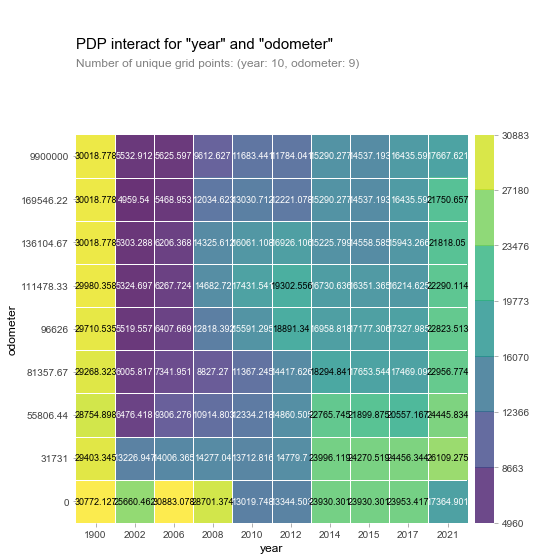

In [108]:
# STRETCH
#  Make multiple PDPs with 2 features in interaction.
feature= ['year', 'odometer']

interaction = pdp_interact(
    model = pipeline,
    dataset = val_imp_df,
    model_features= X_val.columns,
    features= feature
)
pdp_interact_plot(interaction, plot_type='grid', feature_names=feature)
# Kinda meaningless without the drive dictionary

In [64]:
# encoder.get_feature_names 
# Didn't quite get this to work to show drive

In [62]:
#  Make at least 1 Shapley force plot to explain an individual prediction.
row = X_val_imputed.iloc[[5]]
y_val.iloc[[5]], model.predict(row)

(412645   2200.0
 Name: price, dtype: float64,
 array([2549.72]))

In [63]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value= explainer.expected_value,
    shap_values = shap_values,
    features= row

)


In [11]:
## Final model for app usage

target = 'price'
features1 = ['year', 'manufacturer', 'cylinders','fuel', 'odometer', 'drive']
X_train1 = train[features1]
y_train = train[target]
X_val1 = val[features1]
y_val = val[target]
X_test1 = test[features1]
y_test = test[target]

In [ ]:
pipeline1 = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mae', max_depth=18,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=35, n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False)
)
pipeline1.fit(X_train1, y_train)

y_pred = pipeline1.predict(X_val1)
print('MAE:', mean_absolute_error(y_val, y_pred))
print('R^2:', r2_score(y_val, y_pred))



In [61]:
str(X_train1['manufacturer'].unique())

"['audi' 'toyota' 'hyundai' 'rover' 'chevrolet' 'mini' 'ford' 'gmc' 'ram'\n 'dodge' 'nissan' 'kia' 'infiniti' nan 'subaru' 'volkswagen' 'bmw'\n 'chrysler' 'honda' 'mazda' 'cadillac' 'jaguar' 'lexus' 'mercedes-benz'\n 'jeep' 'volvo' 'saturn' 'lincoln' 'mitsubishi' 'acura' 'buick' 'pontiac'\n 'mercury' 'fiat' 'ferrari' 'alfa-romeo' 'tesla' 'harley-davidson'\n 'datsun' 'morgan' 'aston-martin' 'land rover' 'hennessey' 'porche']"

In [13]:
dump(pipeline1, 'pipeline_drive.joblib', compress=True)

['pipeline_drive.joblib']

In [14]:
pipeline1.named_steps.randomforestregressor.feature_importances_

array([0.4060773 , 0.11029073, 0.06472247, 0.12136152, 0.20261594,
       0.09493206])

In [9]:
model1 = load('rfsmall_pipeline.joblib')
model1

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['manufacturer', 'model', 'fuel'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                (...
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=18,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_s